# Forecasting with Facebook Prophet
# Total Electricity

In [176]:
import pandas as pd
from prophet import Prophet
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import logging
%matplotlib inline

In [177]:
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)


In [4]:
def calculate_mape(y_true, y_pred):
  return mean_absolute_percentage_error(y_true, y_pred) * 100

## Cluster 1

In [5]:
# Pull the training, testing, and validation data
original_train_data = pd.read_parquet('dataset/cluster_1/training.parquet')
original_test_data = pd.read_parquet('dataset/cluster_1/test.parquet')
original_validation_data =  pd.read_parquet('dataset/cluster_1/validation.parquet')

In [6]:
# Calculate the sum to get the total electricity per customer per day and format it appropriately
train_total_consumption = original_train_data.sum(axis=0)
train_data = train_total_consumption.to_frame(name='y').reset_index()
train_data.columns = ['ds', 'y']

test_total_consumption = original_test_data.sum(axis=0)
test_data = test_total_consumption.to_frame(name='y').reset_index()
test_data.columns = ['ds', 'y']

validation_total_consumption = original_validation_data.sum(axis=0)
validation_data = validation_total_consumption.to_frame(name='y').reset_index()
validation_data.columns = ['ds', 'y']

In [7]:
# Create and fit the prophet model
model = Prophet()
model.fit(train_data)

12:25:37 - cmdstanpy - INFO - Chain [1] start processing
12:25:38 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
# Forecast on the testing and validation data
test_forecast = model.predict(test_data)
validation_forecast = model.predict(validation_data)

### Validation

In [9]:
plot_plotly(model, validation_forecast)

In [10]:
plot_components_plotly(model, validation_forecast)

c:\Users\brian\anaconda3\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [11]:
# Find MAPE
actual_values = np.array(validation_data['y'])
predicted_values = np.array(validation_forecast['yhat'])

validation_mape = calculate_mape(actual_values, predicted_values)
validation_mape

7.513581569820864

### Test

In [12]:
plot_plotly(model, test_forecast)

In [13]:
plot_components_plotly(model, test_forecast)

c:\Users\brian\anaconda3\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [14]:
# Find MAPE
actual_values = np.array(test_data['y'])
predicted_values = np.array(test_forecast['yhat'])

test_mape = calculate_mape(actual_values, predicted_values)
test_mape

6.420125539075773

### Train

In [15]:
# Find MAPE
train_forecast = model.predict(train_data)
actual_values = np.array(train_data['y'])
predicted_values = np.array(train_forecast['yhat'])

train_mape = calculate_mape(actual_values, predicted_values)
train_mape

3.7544624679594385

## Cluster 2

In [16]:
# Pull the training, testing, and validation data
original_train_data = pd.read_parquet('dataset/cluster_2/training.parquet')
original_test_data = pd.read_parquet('dataset/cluster_2/test.parquet')
original_validation_data =  pd.read_parquet('dataset/cluster_2/validation.parquet')

In [17]:
# Calculate the sum to get the total electricity per customer per day and format it appropriately
train_total_consumption = original_train_data.sum(axis=0)
train_data = train_total_consumption.to_frame(name='y').reset_index()
train_data.columns = ['ds', 'y']

test_total_consumption = original_test_data.sum(axis=0)
test_data = test_total_consumption.to_frame(name='y').reset_index()
test_data.columns = ['ds', 'y']

validation_total_consumption = original_validation_data.sum(axis=0)
validation_data = validation_total_consumption.to_frame(name='y').reset_index()
validation_data.columns = ['ds', 'y']

In [18]:
# Fit prophet model
model2 = Prophet()
model2.fit(train_data)

12:25:41 - cmdstanpy - INFO - Chain [1] start processing
12:25:41 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
# Forecasting
train_forecast = model2.predict(train_data)
test_forecast = model2.predict(test_data)
validation_forecast = model2.predict(validation_data)

### Validation

In [20]:
plot_plotly(model2, validation_forecast)

In [21]:
plot_components_plotly(model2, validation_forecast)

c:\Users\brian\anaconda3\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [22]:
# Find MAPE
actual_values = np.array(validation_data['y'])
predicted_values = np.array(validation_forecast['yhat'])

validation_mape = calculate_mape(actual_values, predicted_values)
validation_mape

6.860222263557579

### Test

In [23]:
plot_plotly(model2, test_forecast)

In [24]:
plot_components_plotly(model2, test_forecast)

c:\Users\brian\anaconda3\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [25]:
# Find MAPE
actual_values = np.array(test_data['y'])
predicted_values = np.array(test_forecast['yhat'])

test_mape = calculate_mape(actual_values, predicted_values)
test_mape

7.072472571286046

### Train

In [26]:
# Find MAPE
actual_values = np.array(train_data['y'])
predicted_values = np.array(train_forecast['yhat'])

train_mape = calculate_mape(actual_values, predicted_values)
train_mape

3.3131587269604372

## Cluster 3

In [27]:
# Pull the training, testing, and validation data
original_train_data = pd.read_parquet('dataset/cluster_3/training.parquet')
original_test_data = pd.read_parquet('dataset/cluster_3/test.parquet')
original_validation_data =  pd.read_parquet('dataset/cluster_3/validation.parquet')

In [28]:
# Calculate the sum to get the total electricity per customer per day and format it appropriately
train_total_consumption = original_train_data.sum(axis=0)
train_data = train_total_consumption.to_frame(name='y').reset_index()
train_data.columns = ['ds', 'y']

test_total_consumption = original_test_data.sum(axis=0)
test_data = test_total_consumption.to_frame(name='y').reset_index()
test_data.columns = ['ds', 'y']

validation_total_consumption = original_validation_data.sum(axis=0)
validation_data = validation_total_consumption.to_frame(name='y').reset_index()
validation_data.columns = ['ds', 'y']

In [29]:
# Fit prophet model
model3 = Prophet()
model3.fit(train_data)

12:25:42 - cmdstanpy - INFO - Chain [1] start processing
12:25:43 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
# Forecasting
train_forecast = model3.predict(train_data)
test_forecast = model3.predict(test_data)
validation_forecast = model3.predict(validation_data)

### Validation

In [31]:
plot_plotly(model3, validation_forecast)

In [32]:
plot_components_plotly(model3, validation_forecast)

c:\Users\brian\anaconda3\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [33]:
# Find MAPE
actual_values = np.array(validation_data['y'])
predicted_values = np.array(validation_forecast['yhat'])

validation_mape = calculate_mape(actual_values, predicted_values)
validation_mape

5.67400894557479

### Test

In [34]:
plot_plotly(model3, test_forecast)

In [35]:
plot_components_plotly(model3, test_forecast)

c:\Users\brian\anaconda3\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [36]:
# Find MAPE
actual_values = np.array(test_data['y'])
predicted_values = np.array(test_forecast['yhat'])

test_mape = calculate_mape(actual_values, predicted_values)
test_mape

4.422495491895859

### Train

In [37]:
# Find MAPE
actual_values = np.array(train_data['y'])
predicted_values = np.array(train_forecast['yhat'])

train_mape = calculate_mape(actual_values, predicted_values)
train_mape

3.344759155758306

## Cluster 4

In [38]:
# Pull the training, testing, and validation data
original_train_data = pd.read_parquet('dataset/cluster_4/training.parquet')
original_test_data = pd.read_parquet('dataset/cluster_4/test.parquet')
original_validation_data =  pd.read_parquet('dataset/cluster_4/validation.parquet')

In [39]:
# Calculate the sum to get the total electricity per customer per day and format it appropriately
train_total_consumption = original_train_data.sum(axis=0)
train_data = train_total_consumption.to_frame(name='y').reset_index()
train_data.columns = ['ds', 'y']

test_total_consumption = original_test_data.sum(axis=0)
test_data = test_total_consumption.to_frame(name='y').reset_index()
test_data.columns = ['ds', 'y']

validation_total_consumption = original_validation_data.sum(axis=0)
validation_data = validation_total_consumption.to_frame(name='y').reset_index()
validation_data.columns = ['ds', 'y']

In [40]:
# Fit prophet model
model4 = Prophet()
model4.fit(train_data)

12:25:44 - cmdstanpy - INFO - Chain [1] start processing


12:25:44 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
# Forecasting
train_forecast = model4.predict(train_data)
test_forecast = model4.predict(test_data)
validation_forecast = model4.predict(validation_data)

### Validation

In [42]:
plot_plotly(model4, validation_forecast)

In [43]:
plot_components_plotly(model4, validation_forecast)

c:\Users\brian\anaconda3\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [44]:
# Find MAPE
actual_values = np.array(validation_data['y'])
predicted_values = np.array(validation_forecast['yhat'])

validation_mape = calculate_mape(actual_values, predicted_values)
validation_mape

10.233485715803768

### Test

In [45]:
plot_plotly(model4, test_forecast)

In [46]:
plot_components_plotly(model4, test_forecast)

c:\Users\brian\anaconda3\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [47]:
# Find MAPE
actual_values = np.array(test_data['y'])
predicted_values = np.array(test_forecast['yhat'])

test_mape = calculate_mape(actual_values, predicted_values)
test_mape

10.399523122332544

### Train

In [48]:
# Find MAPE
actual_values = np.array(train_data['y'])
predicted_values = np.array(train_forecast['yhat'])

train_mape = calculate_mape(actual_values, predicted_values)
train_mape

8.674779542586736

# Total Electricity with Exploratory Variables

In [ ]:
# Load the electricity usage data
NUM_CLUSTERS = 4

training_data = list()
testing_data = list()
validating_data = list()

for i in range(1, NUM_CLUSTERS + 1):
    original_train_data = pd.read_parquet(f'dataset/cluster_{i}/training.parquet').dropna()
    original_test_data = pd.read_parquet(f'dataset/cluster_{i}/validation.parquet').dropna()
    original_validation_data = pd.read_parquet(f'dataset/cluster_{i}/test.parquet').dropna()
    
    train_total_consumption = original_train_data.sum(axis=0)
    training_data.append(train_total_consumption)

    test_total_consumption = original_test_data.sum(axis=0)
    testing_data.append(test_total_consumption)

    validation_total_consumption = original_validation_data.sum(axis=0)
    validating_data.append(validation_total_consumption)

In [ ]:
# Load explanatory variables
explanatory_variables_df = pd.read_parquet('dataset/combined_explanatory_variables/explanatory_variables.parquet')
explanatory_variables_df.index = pd.to_datetime(explanatory_variables_df.index)
explanatory_variables_df = explanatory_variables_df.sort_index().asfreq('D').dropna()
explanatory_variables_df.index = pd.to_datetime(explanatory_variables_df.index).floor('D')

In [115]:
# Combine electricity data with explanatory variables
combined_training_data = list()
combined_testing_data = list()
combined_validating_data = list()

for i in range(NUM_CLUSTERS):
    training_data[i].index = pd.to_datetime(training_data[i].index)
    testing_data[i].index = pd.to_datetime(testing_data[i].index)
    validating_data[i].index = pd.to_datetime(validating_data[i].index)

    train_data = pd.concat([training_data[i], explanatory_variables_df], axis=1).dropna()
    train_data = train_data.rename(columns={0: 'y'}).reset_index().rename(columns={'index': 'ds'})

    combined_training_data.append(train_data)

    test_data = pd.concat([testing_data[i], explanatory_variables_df], axis=1).dropna()
    test_data = test_data.rename(columns={0: 'y'}).reset_index().rename(columns={'index': 'ds'})

    combined_testing_data.append(test_data)

    valid_data = pd.concat([validating_data[i], explanatory_variables_df], axis=1).dropna()
    valid_data = valid_data.rename(columns={0: 'y'}).reset_index().rename(columns={'index': 'ds'})

    combined_validating_data.append(valid_data)

## Cluster 1

In [116]:
model1 = Prophet()
model1.add_regressor('heating_degree_days')
model1.add_regressor('cooling_degree_days')
model1.add_regressor('precip')
model1.add_regressor('precipprob')
model1.add_regressor('is_holiday')
model1.add_regressor('sunlight_length_hours')
model1.add_regressor('is_weekend')
model1.fit(combined_training_data[0])
cluster1_test = model1.predict(combined_testing_data[0].drop(columns=['y']))
cluster1_valid = model1.predict(combined_validating_data[0].drop(columns=['y']))

12:49:03 - cmdstanpy - INFO - Chain [1] start processing
12:49:03 - cmdstanpy - INFO - Chain [1] done processing


In [117]:
plot_plotly(model1, cluster1_test)

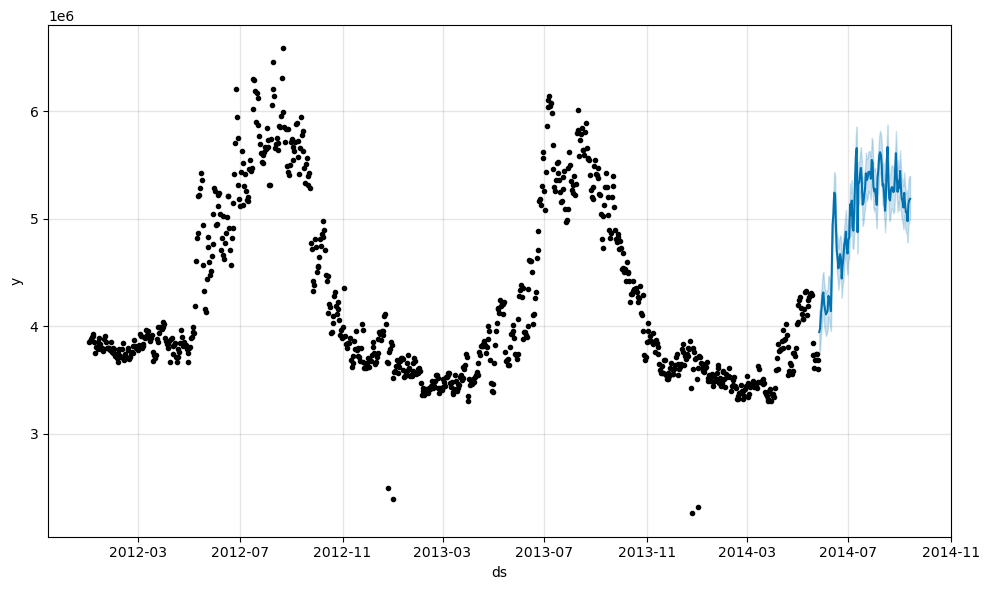

In [118]:
fig1 = model1.plot(cluster1_test)

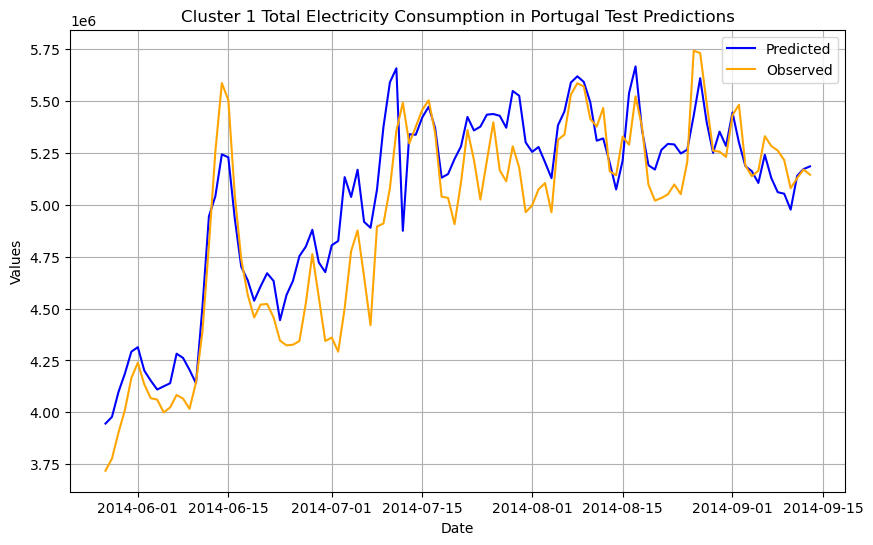

In [135]:
plt.figure(figsize=(10, 6))
plt.plot(cluster1_test['ds'], cluster1_test['yhat'], label='Predicted', color='blue')
plt.plot(cluster1_test['ds'], combined_testing_data[0]['y'], label='Observed', color='orange')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Cluster 1 Total Electricity Consumption in Portugal Test Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [120]:
plot_plotly(model1, cluster1_valid)

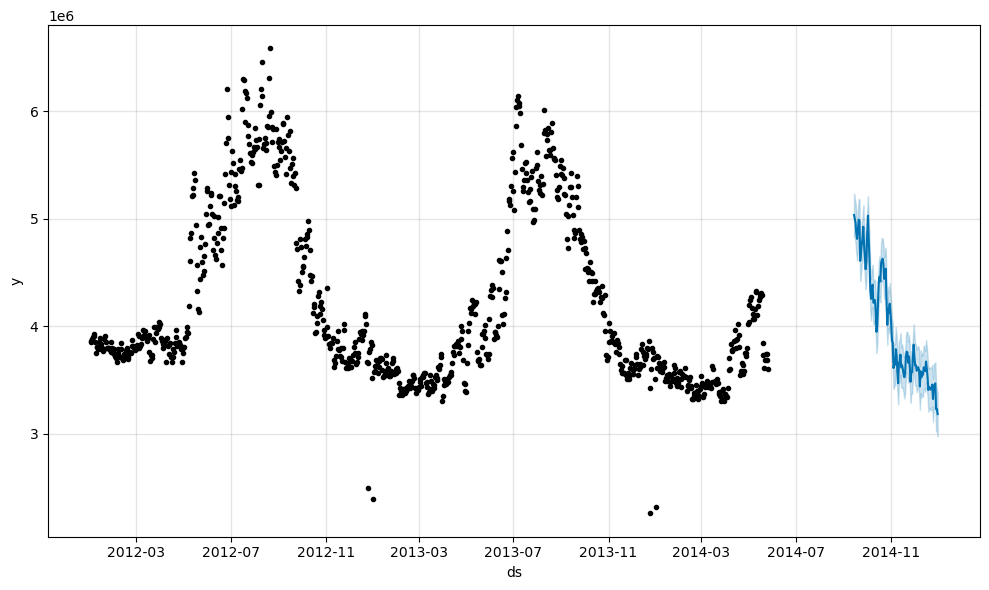

In [121]:
fig1 = model1.plot(cluster1_valid)

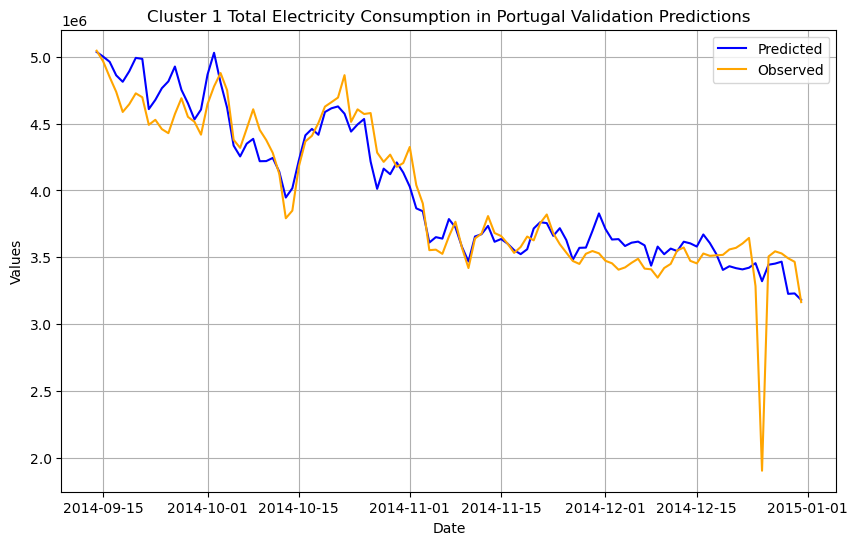

In [134]:
plt.figure(figsize=(10, 6))
plt.plot(cluster1_valid['ds'], cluster1_valid['yhat'], label='Predicted', color='blue')
plt.plot(cluster1_valid['ds'], combined_validating_data[0]['y'], label='Observed', color='orange')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Cluster 1 Total Electricity Consumption in Portugal Validation Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [129]:
# Find MAPE
test_mape = calculate_mape(combined_testing_data[0]['y'], cluster1_test['yhat'])
print(f'Test MAPE: {test_mape}')

valid_mape = calculate_mape(combined_validating_data[0]['y'], cluster1_valid['yhat'])
print(f'Validation MAPE: {valid_mape}')

Test MAPE: 3.5476422886657346
Validation MAPE: 3.6909732894150435


## Cluster 2

In [130]:
model2 = Prophet()
model2.add_regressor('heating_degree_days')
model2.add_regressor('cooling_degree_days')
model2.add_regressor('precip')
model2.add_regressor('precipprob')
model2.add_regressor('is_holiday')
model2.add_regressor('sunlight_length_hours')
model2.add_regressor('is_weekend')
model2.fit(combined_training_data[1])
cluster2_test = model2.predict(combined_testing_data[1].drop(columns=['y']))
cluster2_valid = model2.predict(combined_validating_data[1].drop(columns=['y']))

12:53:15 - cmdstanpy - INFO - Chain [1] start processing
12:53:16 - cmdstanpy - INFO - Chain [1] done processing


In [131]:
plot_plotly(model2, cluster2_test)

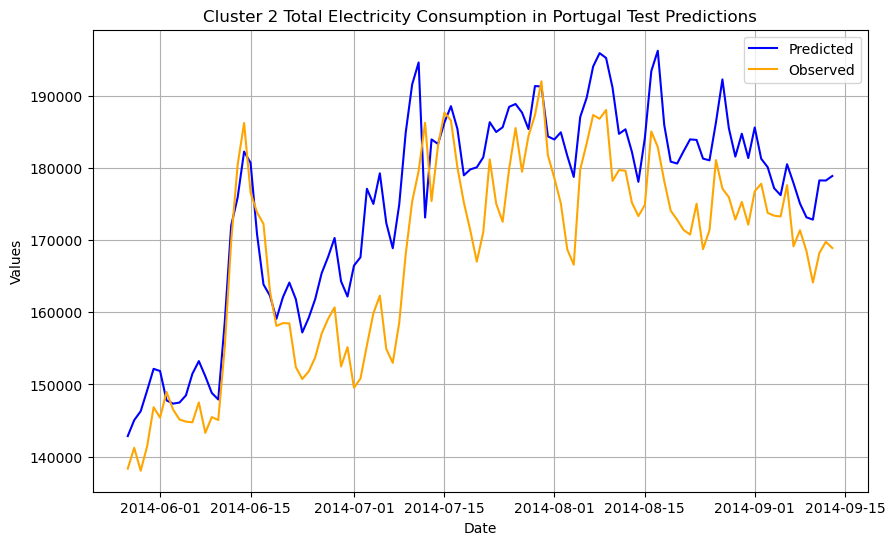

In [132]:
plt.figure(figsize=(10, 6))
plt.plot(cluster2_test['ds'], cluster2_test['yhat'], label='Predicted', color='blue')
plt.plot(cluster2_test['ds'], combined_testing_data[1]['y'], label='Observed', color='orange')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Cluster 2 Total Electricity Consumption in Portugal Test Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [133]:
plot_plotly(model2, cluster2_valid)

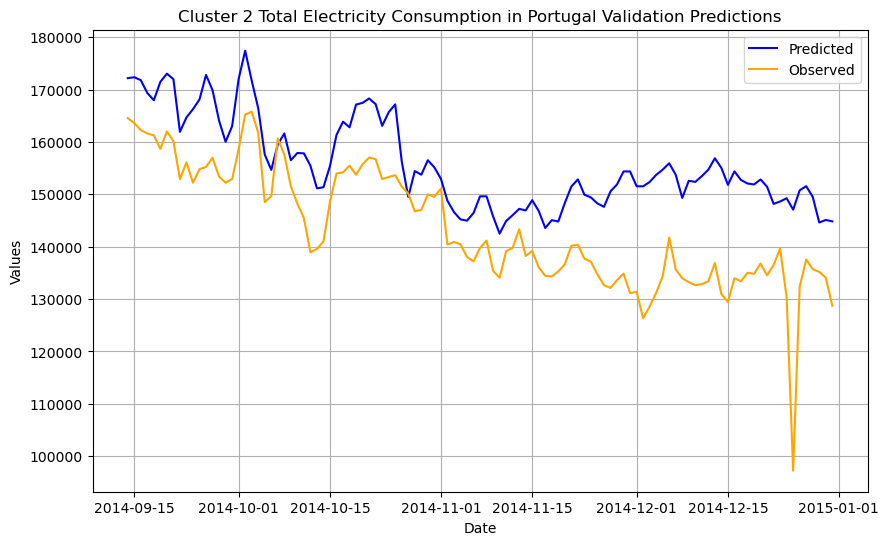

In [136]:
plt.figure(figsize=(10, 6))
plt.plot(cluster2_valid['ds'], cluster2_valid['yhat'], label='Predicted', color='blue')
plt.plot(cluster2_valid['ds'], combined_validating_data[1]['y'], label='Observed', color='orange')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Cluster 2 Total Electricity Consumption in Portugal Validation Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [137]:
# Find MAPE
test_mape = calculate_mape(combined_testing_data[1]['y'], cluster2_test['yhat'])
print(f'Test MAPE: {test_mape}')

valid_mape = calculate_mape(combined_validating_data[1]['y'], cluster2_valid['yhat'])
print(f'Validation MAPE: {valid_mape}')

Test MAPE: 4.679894567289209
Validation MAPE: 8.96710587492599


## Cluster 3

In [141]:
model3 = Prophet()
model3.add_regressor('heating_degree_days')
model3.add_regressor('cooling_degree_days')
model3.add_regressor('precip')
model3.add_regressor('precipprob')
model3.add_regressor('is_holiday')
model3.add_regressor('sunlight_length_hours')
model3.add_regressor('is_weekend')
model3.fit(combined_training_data[2])
cluster3_test = model3.predict(combined_testing_data[2].drop(columns=['y']))
cluster3_valid = model3.predict(combined_validating_data[2].drop(columns=['y']))

12:57:41 - cmdstanpy - INFO - Chain [1] start processing
12:57:41 - cmdstanpy - INFO - Chain [1] done processing


In [142]:
# Find MAPE
test_mape = calculate_mape(combined_testing_data[2]['y'], cluster3_test['yhat'])
print(f'Test MAPE: {test_mape}')

valid_mape = calculate_mape(combined_validating_data[2]['y'], cluster3_valid['yhat'])
print(f'Validation MAPE: {valid_mape}')

Test MAPE: 4.569546666971207
Validation MAPE: 5.133476492559284


## Cluster 4

In [145]:
model4 = Prophet()
model4.add_regressor('heating_degree_days')
model4.add_regressor('cooling_degree_days')
model4.add_regressor('precip')
model4.add_regressor('precipprob')
model4.add_regressor('is_holiday')
model4.add_regressor('sunlight_length_hours')
model4.add_regressor('is_weekend')
model4.fit(combined_training_data[3])
cluster4_test = model4.predict(combined_testing_data[3].drop(columns=['y']))
cluster4_valid = model4.predict(combined_validating_data[3].drop(columns=['y']))

12:58:23 - cmdstanpy - INFO - Chain [1] start processing
12:58:23 - cmdstanpy - INFO - Chain [1] done processing


In [146]:
# Find MAPE
test_mape = calculate_mape(combined_testing_data[3]['y'], cluster4_test['yhat'])
print(f'Test MAPE: {test_mape}')

valid_mape = calculate_mape(combined_validating_data[3]['y'], cluster4_valid['yhat'])
print(f'Validation MAPE: {valid_mape}')

Test MAPE: 9.117562096933405
Validation MAPE: 8.941639657938525


# Scaled Average of Each Cluster

In [147]:
# Load the electricity usage data
NUM_CLUSTERS = 4

cluster_dfs = list()

for i in range(1, NUM_CLUSTERS + 1):
    df = pd.concat([
        pd.read_parquet(f'dataset/cluster_{i}/training.parquet'),
        pd.read_parquet(f'dataset/cluster_{i}/validation.parquet'),
        pd.read_parquet(f'dataset/cluster_{i}/test.parquet'),
    ], axis=1).T.sort_index()
    df.index = pd.to_datetime(df.index)
    df.index.name = 'date'
    cluster_dfs.append(df)

In [148]:
explanatory_variables_df = pd.read_parquet('dataset/combined_explanatory_variables/explanatory_variables.parquet')
explanatory_variables_df.index = pd.to_datetime(explanatory_variables_df.index)
explanatory_variables_df = explanatory_variables_df.sort_index().asfreq('D')

In [149]:
scaler = StandardScaler()

cutoff_date = pd.to_datetime('2014-01-01')

boxcox_dfs = list()
scaled_dfs = list()
mean_series = list()
mean_train_series = list()
mean_test_series = list()

for df in cluster_dfs:
    boxcox_df = df.apply(lambda column: boxcox(column)[0])
    scaled_df = pd.DataFrame(
        scaler.fit_transform(boxcox_df),
        index=boxcox_df.index,
        columns=boxcox_df.columns
    )
    mean = scaled_df.mean(axis=1)
    mean_train = mean[mean.index < cutoff_date]
    mean_test = mean[mean.index >= cutoff_date]
    boxcox_dfs.append(boxcox_df)
    scaled_dfs.append(scaled_df)
    mean_series.append(mean)
    mean_train_series.append(mean_train)
    mean_test_series.append(mean_test)

In [150]:
combined_dfs = list()
for i, df in enumerate(mean_train_series):
    combined_df = pd.concat([df, explanatory_variables_df], axis=1).rename(columns={0: 'y'})
    combined_df = combined_df[combined_df.index < cutoff_date]
    combined_df = combined_df.reset_index().rename(columns={'date': 'ds'})
    combined_dfs.append(combined_df)
combined_dfs[0]

,ds,y,heating_degree_days,cooling_degree_days,precip,precipprob,is_holiday,sunlight_length_hours,is_weekend
0,2012-01-01,NaN,6.578559,0.0,0.000,0.0,0,10.0,1
1,2012-01-02,0.036451,6.659918,0.0,0.111,1.0,0,10.0,0
2,2012-01-03,0.116110,7.977833,0.0,0.000,0.0,0,10.0,0
3,2012-01-04,0.161707,6.335269,0.0,0.000,0.0,0,10.0,0
4,2012-01-05,0.123626,7.437771,0.0,0.000,0.0,0,10.0,0
...,...,...,...,...,...,...,...,...,...
726,2013-12-27,-0.271886,5.549002,0.0,0.048,1.0,0,9.0,0
727,2013-12-28,-0.437442,8.432045,0.0,0.101,1.0,0,9.0,1
728,2013-12-29,-0.608744,9.526014,0.0,0.006,1.0,0,9.0,1
729,2013-12-30,-0.446331,9.994676,0.0,0.000,0.0,0,10.0,0


In [151]:
explanatory_variables_df = explanatory_variables_df.reset_index().rename(columns={'date': 'ds'})
explanatory_variables_df

,ds,heating_degree_days,cooling_degree_days,precip,precipprob,is_holiday,sunlight_length_hours,is_weekend
0,2012-01-01,6.578559,0.0,0.000,0.0,0,10.0,1
1,2012-01-02,6.659918,0.0,0.111,1.0,0,10.0,0
2,2012-01-03,7.977833,0.0,0.000,0.0,0,10.0,0
3,2012-01-04,6.335269,0.0,0.000,0.0,0,10.0,0
4,2012-01-05,7.437771,0.0,0.000,0.0,0,10.0,0
...,...,...,...,...,...,...,...,...
1092,2014-12-28,7.697900,0.0,0.000,0.0,0,9.0,1
1093,2014-12-29,10.921202,0.0,0.000,0.0,0,9.0,0
1094,2014-12-30,11.066679,0.0,0.000,0.0,0,9.0,0
1095,2014-12-31,10.832410,0.0,0.000,0.0,0,10.0,0


In [152]:
explanatory_variables_test = explanatory_variables_df[explanatory_variables_df.ds >= cutoff_date][explanatory_variables_df.ds < pd.to_datetime('2015-01-01')]
explanatory_variables_test

C:\Users\brian\AppData\Local\Temp\ipykernel_15968\825775865.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,ds,heating_degree_days,cooling_degree_days,precip,precipprob,is_holiday,sunlight_length_hours,is_weekend
731,2014-01-01,5.452926,0.0,0.089,1.0,0,10.0,0
732,2014-01-02,3.990161,0.0,0.083,1.0,0,10.0,0
733,2014-01-03,5.410022,0.0,0.348,1.0,0,10.0,0
734,2014-01-04,7.687619,0.0,0.584,1.0,0,10.0,1
735,2014-01-05,6.614942,0.0,0.000,0.0,0,10.0,1
...,...,...,...,...,...,...,...,...
1091,2014-12-27,9.032632,0.0,0.000,0.0,0,9.0,1
1092,2014-12-28,7.697900,0.0,0.000,0.0,0,9.0,1
1093,2014-12-29,10.921202,0.0,0.000,0.0,0,9.0,0
1094,2014-12-30,11.066679,0.0,0.000,0.0,0,9.0,0


## Cluster 1

In [156]:
model1 = Prophet()
model1.add_regressor('heating_degree_days')
model1.add_regressor('cooling_degree_days')
model1.add_regressor('precip')
model1.add_regressor('precipprob')
model1.add_regressor('is_holiday')
model1.add_regressor('sunlight_length_hours')
model1.add_regressor('is_weekend')
model1.fit(combined_dfs[0])
cluster1_test = model1.predict(explanatory_variables_test)

13:10:56 - cmdstanpy - INFO - Chain [1] start processing
13:10:56 - cmdstanpy - INFO - Chain [1] done processing


In [154]:
plot_plotly(model1, cluster1_test)

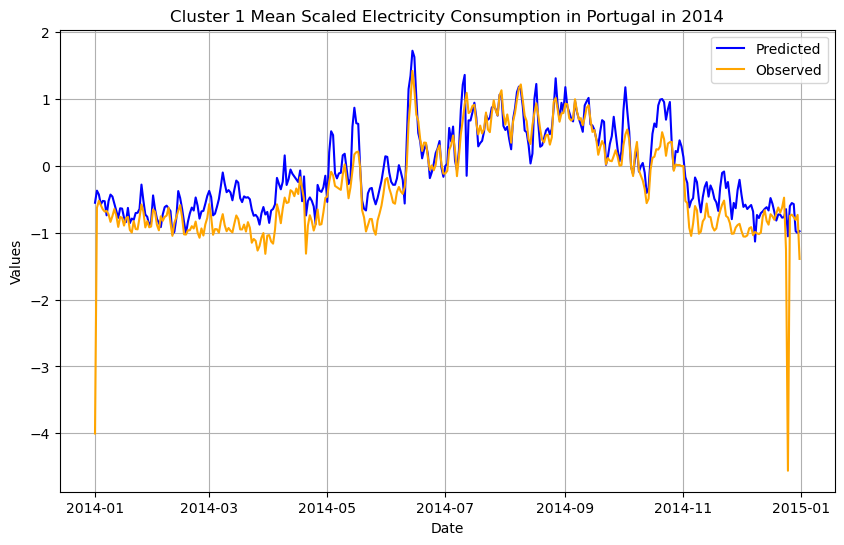

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(cluster1_test['ds'], cluster1_test['yhat'], label='Predicted', color='blue')
plt.plot(cluster1_test['ds'], mean_test_series[0], label='Observed', color='orange')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Cluster 1 Mean Scaled Electricity Consumption in Portugal in 2014')
plt.legend()
plt.grid(True)
plt.show()

In [158]:
test_mape = calculate_mape(mean_test_series[0], cluster1_test['yhat'])
print(f'Test MAPE: {test_mape}')

Test MAPE: 170.56030732086674


## Cluster 2

In [162]:
model2 = Prophet()
model2.add_regressor('heating_degree_days')
model2.add_regressor('cooling_degree_days')
model2.add_regressor('precip')
model2.add_regressor('precipprob')
model2.add_regressor('is_holiday')
model2.add_regressor('sunlight_length_hours')
model2.add_regressor('is_weekend')
model2.fit(combined_dfs[1])
cluster2_test = model2.predict(explanatory_variables_test)

13:20:38 - cmdstanpy - INFO - Chain [1] start processing
13:20:38 - cmdstanpy - INFO - Chain [1] done processing


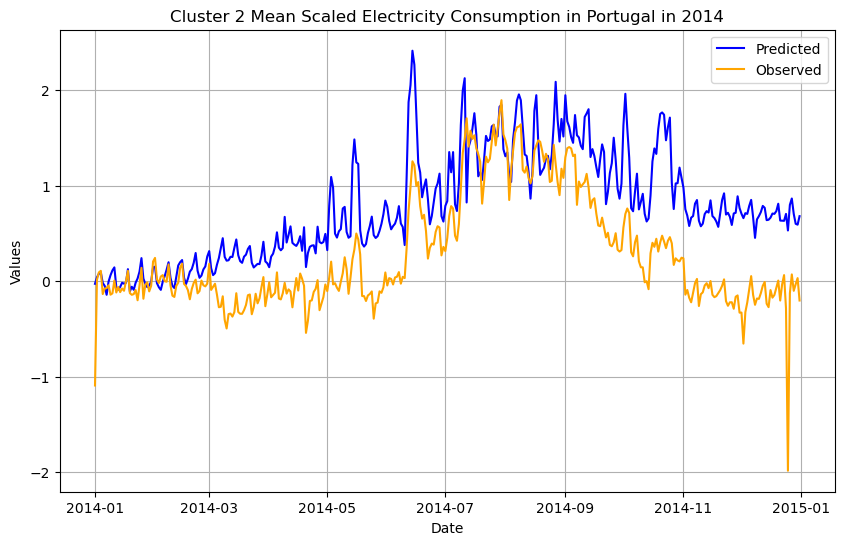

In [163]:
plt.figure(figsize=(10, 6))
plt.plot(cluster2_test['ds'], cluster2_test['yhat'], label='Predicted', color='blue')
plt.plot(cluster2_test['ds'], mean_test_series[1], label='Observed', color='orange')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Cluster 2 Mean Scaled Electricity Consumption in Portugal in 2014')
plt.legend()
plt.grid(True)
plt.show()

In [164]:
test_mape = calculate_mape(mean_test_series[1], cluster2_test['yhat'])
print(f'Test MAPE: {test_mape}')

Test MAPE: 776.0191683580442


## Cluster 3

In [170]:
model3 = Prophet()
model3.add_regressor('heating_degree_days')
model3.add_regressor('cooling_degree_days')
model3.add_regressor('precip')
model3.add_regressor('precipprob')
model3.add_regressor('is_holiday')
model3.add_regressor('sunlight_length_hours')
model3.add_regressor('is_weekend')
model3.fit(combined_dfs[2])
cluster3_test = model3.predict(explanatory_variables_test)

13:21:59 - cmdstanpy - INFO - Chain [1] start processing
13:21:59 - cmdstanpy - INFO - Chain [1] done processing


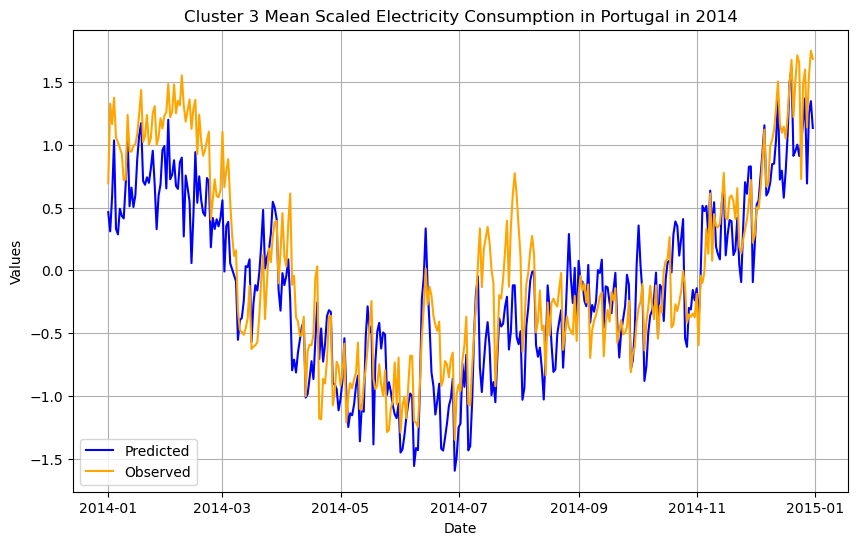

In [171]:
plt.figure(figsize=(10, 6))
plt.plot(cluster3_test['ds'], cluster3_test['yhat'], label='Predicted', color='blue')
plt.plot(cluster3_test['ds'], mean_test_series[2], label='Observed', color='orange')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Cluster 3 Mean Scaled Electricity Consumption in Portugal in 2014')
plt.legend()
plt.grid(True)
plt.show()

In [172]:
test_mape = calculate_mape(mean_test_series[2], cluster3_test['yhat'])
print(f'Test MAPE: {test_mape}')

Test MAPE: 252.37861708487958


## Cluster 4

In [173]:
model4 = Prophet()
model4.add_regressor('heating_degree_days')
model4.add_regressor('cooling_degree_days')
model4.add_regressor('precip')
model4.add_regressor('precipprob')
model4.add_regressor('is_holiday')
model4.add_regressor('sunlight_length_hours')
model4.add_regressor('is_weekend')
model4.fit(combined_dfs[3])
cluster4_test = model4.predict(explanatory_variables_test)

13:22:49 - cmdstanpy - INFO - Chain [1] start processing
13:22:49 - cmdstanpy - INFO - Chain [1] done processing


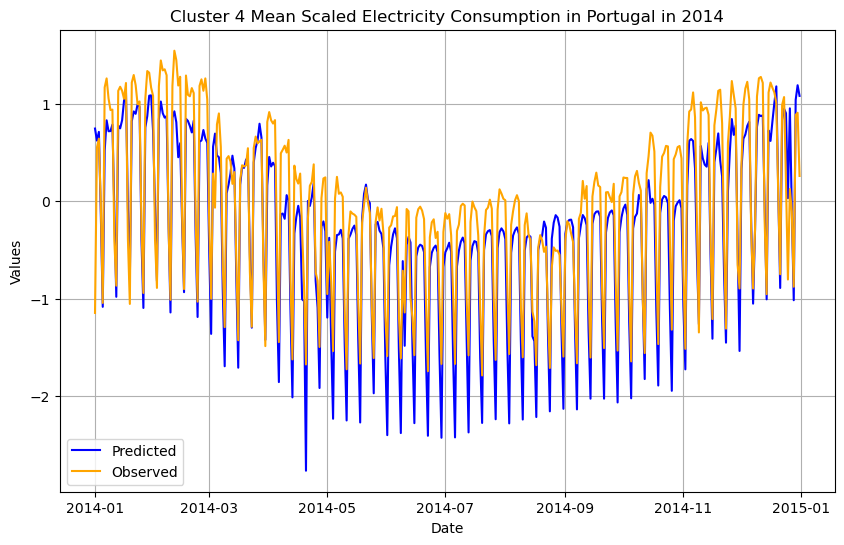

In [174]:
plt.figure(figsize=(10, 6))
plt.plot(cluster4_test['ds'], cluster4_test['yhat'], label='Predicted', color='blue')
plt.plot(cluster4_test['ds'], mean_test_series[3], label='Observed', color='orange')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Cluster 4 Mean Scaled Electricity Consumption in Portugal in 2014')
plt.legend()
plt.grid(True)
plt.show()

In [175]:
test_mape = calculate_mape(mean_test_series[3], cluster4_test['yhat'])
print(f'Test MAPE: {test_mape}')

Test MAPE: 263.83565678483757


# Modeling Each Individual Customer Instead of Average or Total Electricity Consumption

In [178]:
# Load the electricity usage data
NUM_CLUSTERS = 4

all_data_df = pd.DataFrame()
clustered_customers = list()

for i in range(1, NUM_CLUSTERS + 1):
    df = pd.concat([
        pd.read_parquet(f'dataset/cluster_{i}/training.parquet'),
        pd.read_parquet(f'dataset/cluster_{i}/validation.parquet'),
        pd.read_parquet(f'dataset/cluster_{i}/test.parquet'),
    ], axis=1).T.sort_index()
    df.index = pd.to_datetime(df.index)
    df.index.name = 'date'
    clustered_customers.append(list(df.columns))
    all_data_df  = pd.concat([all_data_df, df], axis=1)

In [179]:
customers = ['MT_091', 'MT_100', 'MT_101', 'MT_104', 'MT_137', 'MT_139', 'MT_145', 'MT_147', 'MT_166', 'MT_168', 'MT_175', 'MT_180', 'MT_182', 'MT_190', 'MT_193', 'MT_194', 'MT_195', 'MT_200', 'MT_204', 'MT_210', 'MT_212', 'MT_213', 'MT_215', 'MT_216', 'MT_218', 'MT_220', 'MT_222', 'MT_225', 'MT_227', 'MT_232', 'MT_233', 'MT_234', 'MT_237', 'MT_238', 'MT_239', 'MT_242', 'MT_243', 'MT_247', 'MT_248', 'MT_250', 'MT_251', 'MT_252', 'MT_253', 'MT_254', 'MT_256', 'MT_257', 'MT_258', 'MT_259', 'MT_261', 'MT_264', 'MT_266', 'MT_269', 'MT_271', 'MT_273', 'MT_274', 'MT_277', 'MT_278', 'MT_280', 'MT_282', 'MT_283', 'MT_285', 'MT_287', 'MT_294', 'MT_296', 'MT_298', 'MT_300', 'MT_301', 'MT_303', 'MT_304', 'MT_306', 'MT_307', 'MT_309', 'MT_310', 'MT_311', 'MT_313', 'MT_314', 'MT_315', 'MT_317', 'MT_318', 'MT_319', 'MT_320', 'MT_321', 'MT_323', 'MT_324', 'MT_326', 'MT_327', 'MT_328', 'MT_329', 'MT_341', 'MT_345', 'MT_350', 'MT_352', 'MT_353', 'MT_356', 'MT_357', 'MT_360', 'MT_363', 'MT_364', 'MT_365', 'MT_369', 'MT_098', 'MT_099', 'MT_103', 'MT_105', 'MT_126', 'MT_154', 'MT_172', 'MT_189', 'MT_191', 'MT_192', 'MT_197', 'MT_198', 'MT_199', 'MT_201', 'MT_202', 'MT_203', 'MT_205', 'MT_206', 'MT_207', 'MT_209', 'MT_211', 'MT_214', 'MT_217', 'MT_221', 'MT_229', 'MT_230', 'MT_231', 'MT_236', 'MT_240', 'MT_244', 'MT_245', 'MT_246', 'MT_263', 'MT_275', 'MT_286', 'MT_293', 'MT_297', 'MT_312', 'MT_325', 'MT_330', 'MT_335', 'MT_338', 'MT_339', 'MT_340', 'MT_343', 'MT_344', 'MT_346', 'MT_349', 'MT_351', 'MT_354', 'MT_355', 'MT_358', 'MT_361', 'MT_068', 'MT_150', 'MT_171', 'MT_260', 'MT_262', 'MT_265', 'MT_268', 'MT_270', 'MT_281', 'MT_284', 'MT_292', 'MT_295', 'MT_299', 'MT_331', 'MT_342', 'MT_148', 'MT_149', 'MT_161', 'MT_196', 'MT_228', 'MT_267', 'MT_276', 'MT_359', 'MT_208', 'MT_279', 'MT_362', 'MT_119', 'MT_007', 'MT_102', 'MT_272', 'MT_174', 'MT_241', 'MT_226', 'MT_141', 'MT_138', 'MT_316', 'MT_142', 'MT_143', 'MT_125', 'MT_118', 'MT_086', 'MT_057', 'MT_002', 'MT_051', 'MT_176', 'MT_169', 'MT_073', 'MT_079', 'MT_082', 'MT_004', 'MT_008', 'MT_017', 'MT_020', 'MT_027', 'MT_028', 'MT_031', 'MT_034', 'MT_037', 'MT_042', 'MT_043', 'MT_044', 'MT_048', 'MT_050', 'MT_053', 'MT_054', 'MT_056', 'MT_060', 'MT_062', 'MT_065', 'MT_069', 'MT_071', 'MT_072', 'MT_074', 'MT_075', 'MT_076', 'MT_080', 'MT_081', 'MT_083', 'MT_085', 'MT_088', 'MT_089', 'MT_334', 'MT_011', 'MT_016', 'MT_019', 'MT_021', 'MT_026', 'MT_035', 'MT_046', 'MT_049', 'MT_058', 'MT_061', 'MT_063', 'MT_070', 'MT_018', 'MT_059', 'MT_087', 'MT_005', 'MT_006', 'MT_025', 'MT_052', 'MT_067', 'MT_333', 'MT_336', 'MT_235', 'MT_291', 'MT_014', 'MT_077', 'MT_095', 'MT_096', 'MT_164']

In [180]:
explanatory_variables_df = pd.read_parquet('dataset/combined_explanatory_variables/explanatory_variables.parquet')
explanatory_variables_df.index = pd.to_datetime(explanatory_variables_df.index)
explanatory_variables_df = explanatory_variables_df.sort_index().asfreq('D')

In [181]:
combined_df = pd.concat([all_data_df, explanatory_variables_df], axis=1)
combined_df = combined_df.reset_index().rename(columns={'date': 'ds'})
combined_df = combined_df.dropna()

In [185]:
cutoff_date = pd.to_datetime('2014-01-01')

logging.getLogger('cmdstanpy').setLevel(logging.ERROR)

mape_values = dict()
predictions = dict()

for customer in customers:
    customer_df = combined_df.rename(columns={customer: 'y'})
    train_df = customer_df[customer_df.ds < cutoff_date]
    test_df = customer_df[customer_df.ds >= cutoff_date]
    model = Prophet()
    model.add_regressor('heating_degree_days')
    model.add_regressor('cooling_degree_days')
    model.add_regressor('precip')
    model.add_regressor('precipprob')
    model.add_regressor('is_holiday')
    model.add_regressor('sunlight_length_hours')
    model.add_regressor('is_weekend')
    model.fit(train_df)
    forecast = model.predict(test_df.drop(columns='y'))
    mape = calculate_mape(test_df['y'], forecast['yhat'])
    mape_values[customer] = mape
    predictions[customer] = forecast
    # print(f'{customer} MAPE: {mape:.4f}')

Minimum MAPE for Cluster 1: 3.056855551051544


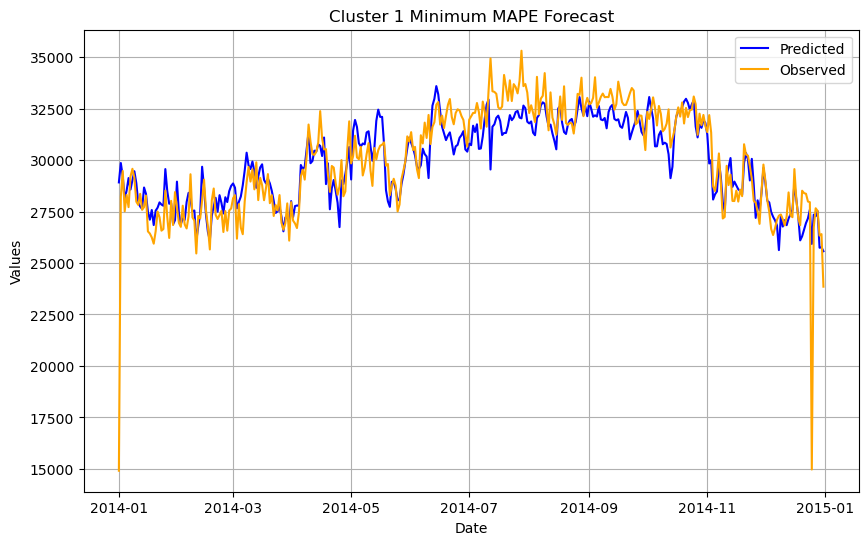

Maximum MAPE for Cluster 1: 94.07805507454289


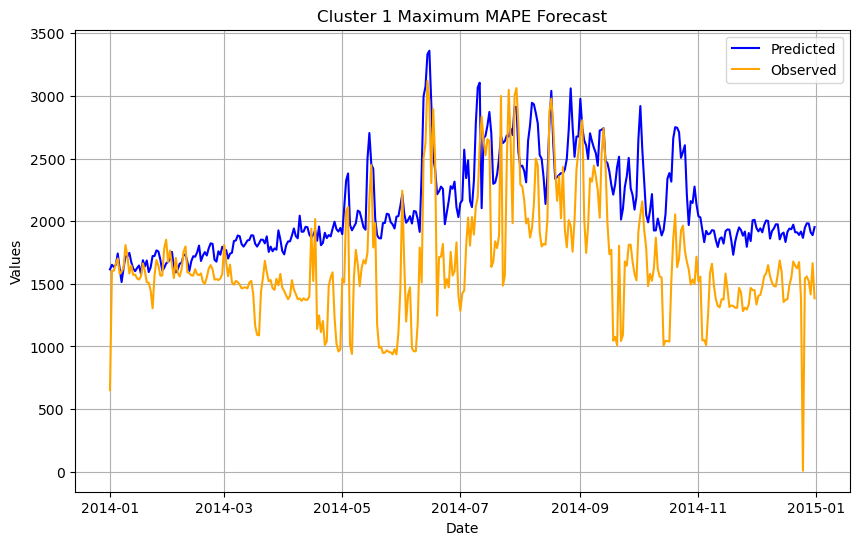

Minimum MAPE for Cluster 2: 4.116033437234064


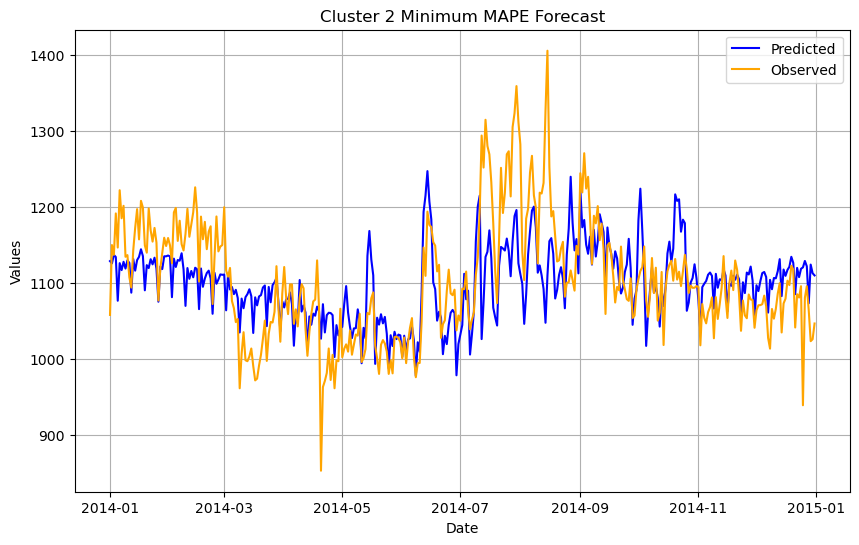

Maximum MAPE for Cluster 2: 117.52753413974956


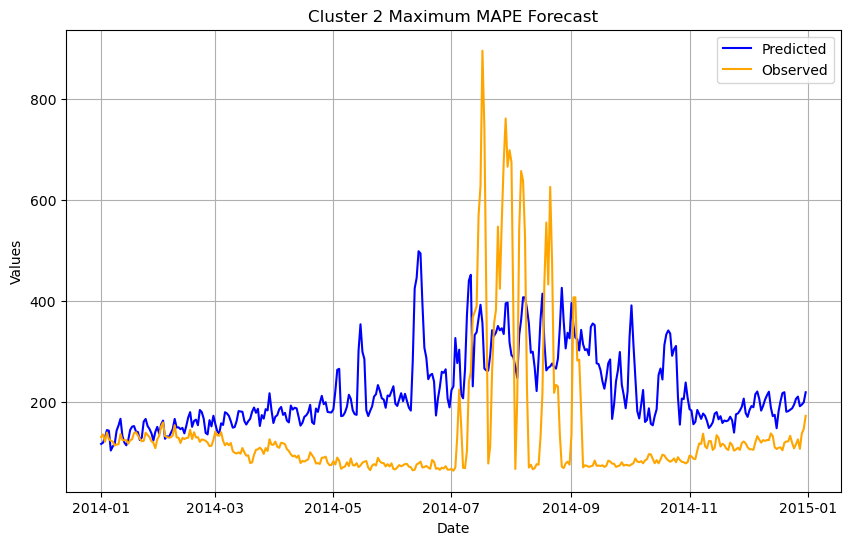

Minimum MAPE for Cluster 3: 4.555111131634736


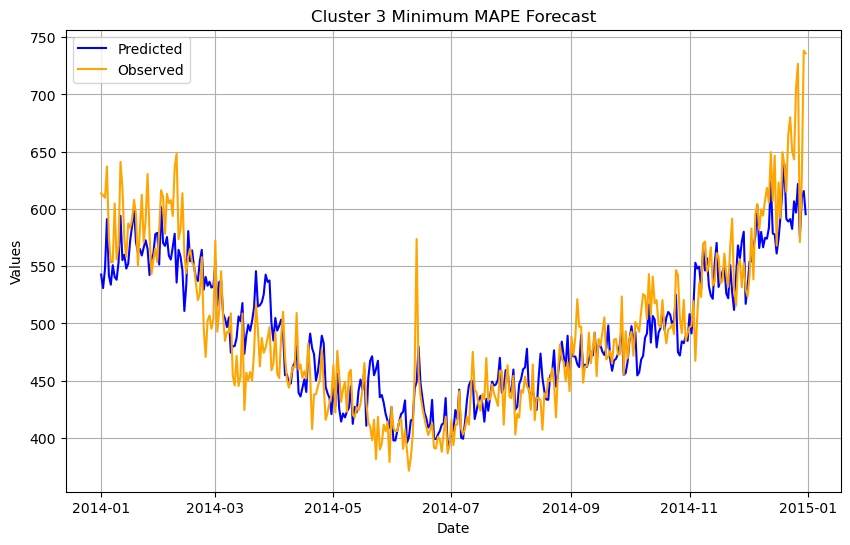

Maximum MAPE for Cluster 3: 224.00234743235345


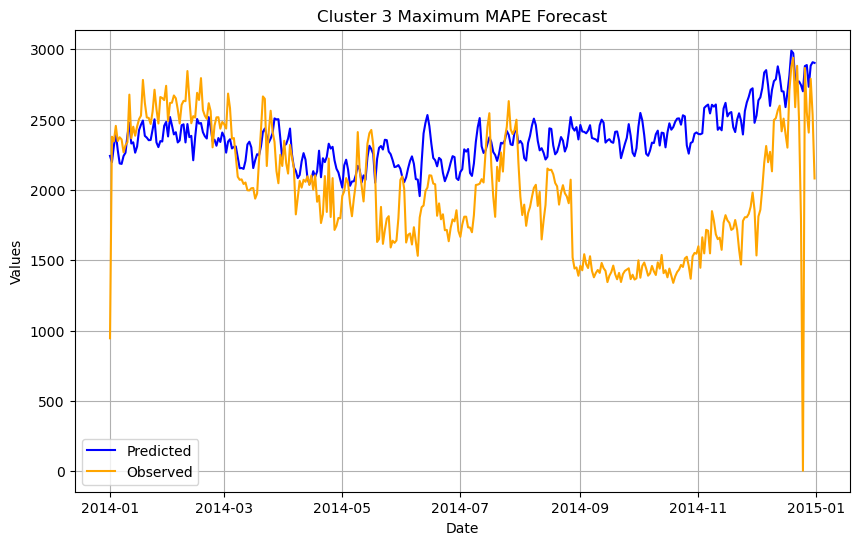

Minimum MAPE for Cluster 4: 11.79496690829777


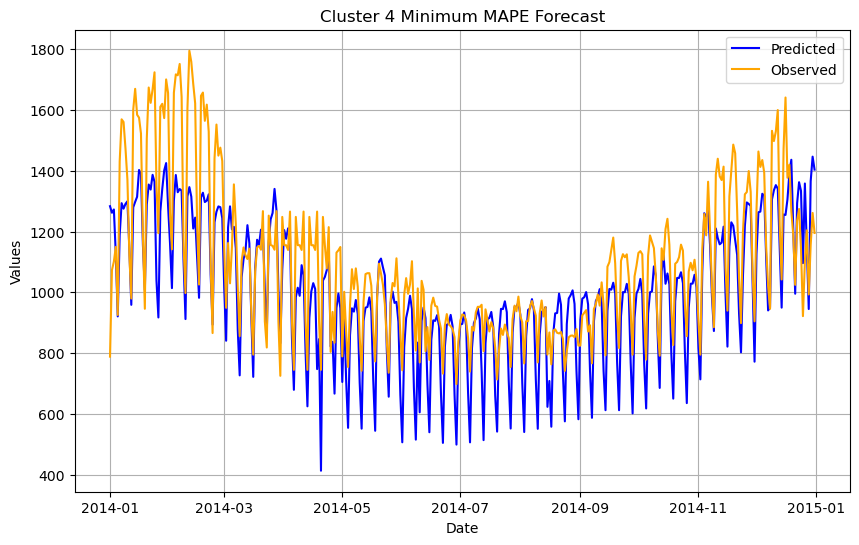

Maximum MAPE for Cluster 4: 65.9269162330464


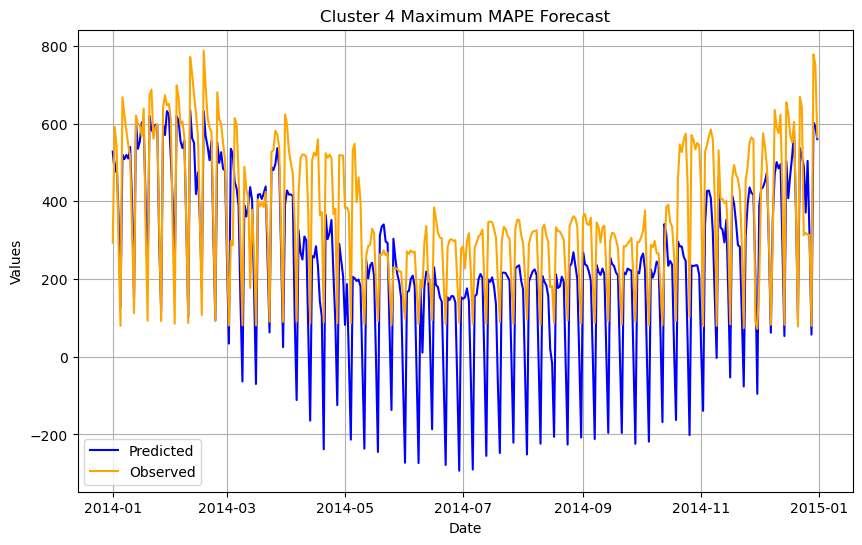

In [186]:
min_mapes = list()
max_mapes = list()

for i in range(len(clustered_customers)):
    min_mape = clustered_customers[i][0]
    max_mape = clustered_customers[i][0]
    for customer in clustered_customers[i]:
        if mape_values[customer] < mape_values[min_mape]:
            min_mape = customer
        if mape_values[customer] > mape_values[max_mape]:
            max_mape = customer

    min_mapes.append(min_mape)
    max_mapes.append(max_mape)

    print(f'Minimum MAPE for Cluster {i+1}: {mape_values[min_mape]}')

    plt.figure(figsize=(10, 6))

    plt.plot(predictions[min_mape]['ds'], predictions[min_mape]['yhat'], label='Predicted', color='blue')

    plt.plot(predictions[min_mape]['ds'], combined_df[customer_df.ds >= cutoff_date][min_mape], label='Observed', color='orange')

    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(f'Cluster {i+1} Minimum MAPE Forecast')
    plt.legend()
    plt.grid(True)
    plt.show()


    print(f'Maximum MAPE for Cluster {i+1}: {mape_values[max_mape]}')

    plt.figure(figsize=(10, 6))

    plt.plot(predictions[max_mape]['ds'], predictions[max_mape]['yhat'], label='Predicted', color='blue')

    plt.plot(predictions[max_mape]['ds'], combined_df[customer_df.ds >= cutoff_date][max_mape], label='Observed', color='orange')

    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(f'Cluster {i+1} Maximum MAPE Forecast')
    plt.legend()
    plt.grid(True)
    plt.show()
